In [1]:
import torch
import torchvision.models as models
import pandas as pd
import torch.nn as nn


# Load the model
device = torch.device("cpu")
model = torch.load("gluex_mfield_mlp.pt", map_location=device)
model.eval()

# Print the dimensions of each layer
for name, param in model.named_parameters():
    print(f"Layer: {name}\tShape: {param.shape}")

Layer: layer_0.weight	Shape: torch.Size([30, 3])
Layer: layer_0.bias	Shape: torch.Size([30])
Layer: layer_1.weight	Shape: torch.Size([30, 30])
Layer: layer_1.bias	Shape: torch.Size([30])
Layer: layer_2.weight	Shape: torch.Size([30, 30])
Layer: layer_2.bias	Shape: torch.Size([30])
Layer: output_layer.weight	Shape: torch.Size([3, 30])
Layer: output_layer.bias	Shape: torch.Size([3])


/Users/xinxinmei/opt/anaconda3/lib/python3.9/site-packages/torch/serialization.py:707: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


In [2]:
# Load the input data from the CSV file
csv_file = "captures.csv"  # from running phasm-example-magfieldmap
data_frame = pd.read_csv(csv_file)

In [3]:
data_frame

,x,y,z,Bx,By,Bz
0,-20,-20,0,0.136257,0.136257,1.07503
1,-20,-20,2,0.134408,0.134408,1.10353
2,-20,-20,4,0.132276,0.132276,1.13157
3,-20,-20,6,0.129878,0.129878,1.15908
4,-20,-20,8,0.127231,0.127231,1.18599
...,...,...,...,...,...,...
4995,16,16,90,-0.028906,-0.028906,1.73041
4996,16,16,92,-0.028446,-0.028446,1.73763
4997,16,16,94,-0.027969,-0.027969,1.74474
4998,16,16,96,-0.027473,-0.027473,1.75174


In [4]:
features = data_frame[['x',' y',' z']].values
targets = data_frame[[' Bx',' By',' Bz']].values

print(targets)

[[ 0.136257   0.136257   1.07503  ]
 [ 0.134408   0.134408   1.10353  ]
 [ 0.132276   0.132276   1.13157  ]
 ...
 [-0.0279692 -0.0279692  1.74474  ]
 [-0.027473  -0.027473   1.75174  ]
 [-0.0269563 -0.0269563  1.75862  ]]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
    predictions = model(torch.as_tensor(features, dtype=torch.float32)).numpy()
    residuals = targets - predictions

mse_per_row = np.mean(residuals ** 2, axis=1)

# Calculate the summation of MSE values
mse_sum = np.sum(mse_per_row)

# Print the summation of MSE values
print("MSE loss:", mse_sum/len(residuals))

MSE loss: 0.00010808946080831841


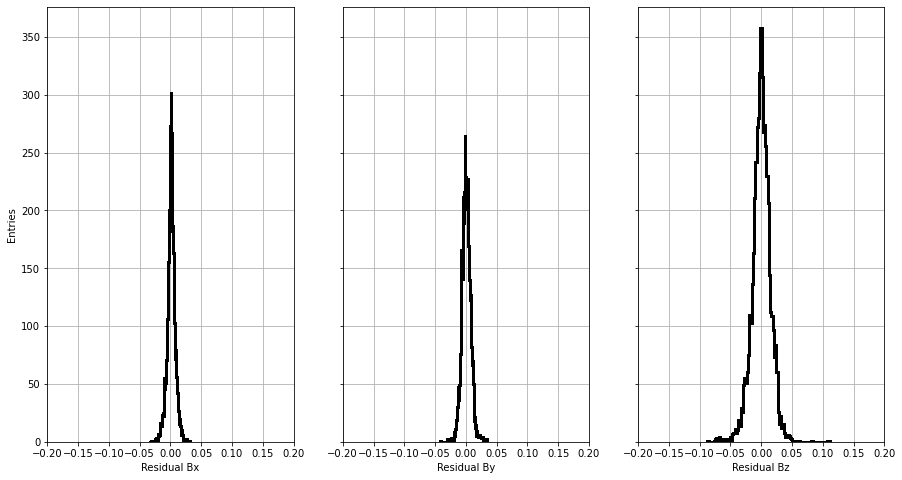

In [6]:
figr, axr = plt.subplots(1,3,figsize=(15,8),sharey=True)

axr[0].hist(residuals[:,0],100,histtype='step',color='k',linewidth=3.0)
axr[0].set_xlabel('Residual Bx')
axr[0].set_ylabel('Entries')
axr[0].grid(True)
axr[0].set_xlim(-0.2,0.2)

axr[1].hist(residuals[:,1],100,histtype='step',color='k',linewidth=3.0)
axr[1].set_xlabel('Residual By')
axr[1].grid(True)
axr[1].set_xlim(-0.2,0.2)

axr[2].hist(residuals[:,2],100,histtype='step',color='k',linewidth=3.0)
axr[2].set_xlabel('Residual Bz')
axr[2].grid(True)
axr[2].set_xlim(-0.2,0.2)


plt.show()